### Simple Linear regression 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

## Dataset 
Given the dataset of housing prices with 4 features : 'size(sqft)','bedrooms','floors','age' and the prices. Come up with a multiple variable linear regression model

In [18]:
#### Load dataset
def load_data():
    data = np.loadtxt("houses.txt",delimiter=",")
    #print(data)
    X = data[:,:4]
    #print(X)
    Y = data[:,4]
    #print(Y)
    return X,Y

In [19]:
import os
print(os.getcwd())
print(os.listdir("."))

C:\Users\sanka\OneDrive\Desktop\Workspace\datascience\Linear Regression
['.ipynb_checkpoints', '01. Linear Regression - House price prediction.ipynb', 'houses.txt']


In [21]:
X_train,Y_train = load_data()
X_features = ['size(sqft)','bedrooms','floors','age']

In [22]:
print(X_train)

[[9.520e+02 2.000e+00 1.000e+00 6.500e+01]
 [1.244e+03 3.000e+00 1.000e+00 6.400e+01]
 [1.947e+03 3.000e+00 2.000e+00 1.700e+01]
 [1.725e+03 3.000e+00 2.000e+00 4.200e+01]
 [1.959e+03 3.000e+00 2.000e+00 1.500e+01]
 [1.314e+03 2.000e+00 1.000e+00 1.400e+01]
 [8.640e+02 2.000e+00 1.000e+00 6.600e+01]
 [1.836e+03 3.000e+00 1.000e+00 1.700e+01]
 [1.026e+03 3.000e+00 1.000e+00 4.300e+01]
 [3.194e+03 4.000e+00 2.000e+00 8.700e+01]
 [7.880e+02 2.000e+00 1.000e+00 8.000e+01]
 [1.200e+03 2.000e+00 2.000e+00 1.700e+01]
 [1.557e+03 2.000e+00 1.000e+00 1.800e+01]
 [1.430e+03 3.000e+00 1.000e+00 2.000e+01]
 [1.220e+03 2.000e+00 1.000e+00 1.500e+01]
 [1.092e+03 2.000e+00 1.000e+00 6.400e+01]
 [8.480e+02 1.000e+00 1.000e+00 1.700e+01]
 [1.682e+03 3.000e+00 2.000e+00 2.300e+01]
 [1.768e+03 3.000e+00 2.000e+00 1.800e+01]
 [1.040e+03 3.000e+00 1.000e+00 4.400e+01]
 [1.652e+03 2.000e+00 1.000e+00 2.100e+01]
 [1.088e+03 2.000e+00 1.000e+00 3.500e+01]
 [1.316e+03 3.000e+00 1.000e+00 1.400e+01]
 [1.593e+03

### Scaling the features

In [26]:
scalar = StandardScaler()
X_norm = scalar.fit_transform(X_train)
print(f"peak to peak range of X = {np.ptp(X_train, axis=0)}")
print(f"peak to peak range of X = {np.ptp(X_norm,axis=0)}")

peak to peak range of X = [2.406e+03 4.000e+00 1.000e+00 9.500e+01]
peak to peak range of X = [5.83735704 6.12923357 2.06021411 3.68430905]


### Fitting the model

In [28]:
sgd = SGDRegressor()
sgd.fit(X_norm, Y_train)
print(f"Number of iteration = {sgd.n_iter_} value update = {sgd.t_}")

Number of iteration = 119 value update = 11901.0


In [31]:
### Parameters
w_norm = sgd.coef_
b_norm = sgd.intercept_
print(f"Model parameters are w_norm = {w_norm} x_norm = {b_norm} ")

Model parameters are w_norm = [110.10590355 -21.18768507 -32.35763667 -37.84020176] x_norm = [362.23983016] 


In [33]:
y_sgd_pred = sgd.predict(X_norm)

y_calc = np.dot(X_norm, w_norm) + b_norm

print (f"predicted GSD == predicted np calculated = {(y_sgd_pred == y_calc).all()}")

predicted GSD == predicted np calculated = True


AttributeError: 'PathCollection' object has no attribute 'set_xlabel'

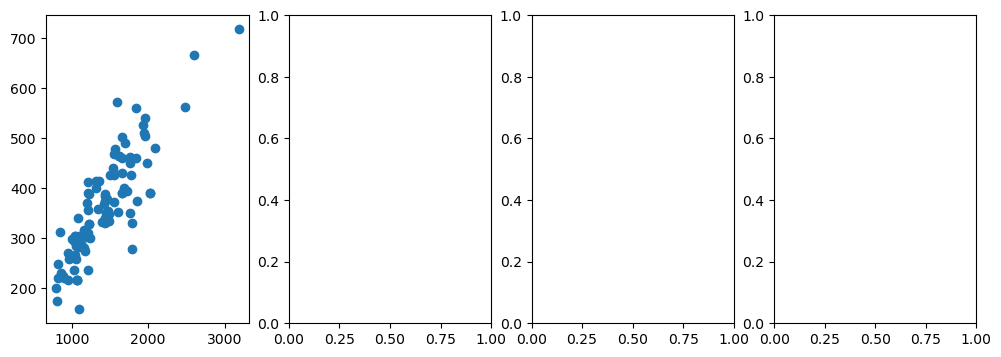

In [37]:
fig, ax = plt.subplots(1,4,figsize=(12,4))
for i in range(len(ax)):
    ax[i] = ax[i].scatter(X_train[:,i],Y_train,label="Train")
    ax[i] = ax[i].set_xlabel(X_features[i])